*In the 2015 movie The Martian, a rocket flying to Mars makes the trip in two legs of the journey: during the first half of the trip, they are constantly burning their engines, accelerating the entire time. Then, during the second half of the trip, they turn the rocket around and blast in reverse so that they can slow down to pick up an astronaut stranded on Mars. At no point in the journey do they turn off the engines and just coast. Is this the most efficient way to get to Mars? Why or why not?*


![](https://briankoberlein.com/wp-content/uploads/maxresdefault5-1200x563.jpg)

In [1]:
import matplotlib.pyplot as plt
from math import *

Let's start by defining a variable for the distance to Mars. 

In [2]:
marsDist = 225E9 #m

From this [article](https://briankoberlein.com/2015/10/06/the-science-behind-the-martian-hermes-spacecraft/) about the Hermes spacecraft, we see that the Hermes was driven at a constant acceleration of $2\;\textrm{mm/s}^2$. 

In [3]:
a_Hermes =0.002

We will simplify this problem to consider a 1D journey from Earth to Mars, with the spacecraft starting and ending at rest, and traveling a distance of 225 million km. 

### Analytical solution

![](Earth-Mars.png)

If we assume that the spacecraft reverses its acceleration at $\frac{d}{2}$, we can algebraically solve for the time it will take Hermes to reach Mars. We can begin by calculating the time it takes to reach the halfway point using kinematic equations. 

$$\frac{1}{2}d=x_0+v_0t+\frac{1}{2}at^2$$

Starting with an initial position of 0, and an initial velocity of 0, this equation simplifies to

$$d=at^2$$

Solving for $t$:

$$t=\sqrt{\frac{d}{a}}$$

This motion is symmetric, so it will take the same time to slow reach Mars, making the total time, $T_{Heremes}$, 

$$T_{Heremes} = 2t = 2\sqrt{\frac{d}{a}}$$

In [4]:
T_Hermes = 2*sqrt(marsDist/a_Hermes) #days
print(T_Hermes/3600/24)

245.52318791199568


For comparison, let's consider a simplified version of the SpaceX mission to Mars using the Big Falcon Rocket (BFR). In this case, the rocket will accelerate briefly to a maximum speed, and maintain that speed for the journey until it breifly deaccelerates when arriving at Mars. We will use the following assumptions: 

In [5]:
BFR_maxV=7.5e3 #m/s
BFR_thrustT=600 #s
BFR_accel=7.5e3/BFR_thrustT
max_deaccel=60 #m/s/s
BFR_deaccelT=BFR_maxV/max_deaccel

print ("Avg accel in g's",BFR_accel/10)
print ("Deacceleration time in s",BFR_deaccelT)


Avg accel in g's 1.25
Deacceleration time in s 125.0


We can illustrate the motion of this spacecraft with a velocity vs time graph, and use it to help us to solve for the total travel time, $T_{BFR}$:

![](BFR_V_Graph.jpg)

In [6]:
T_BFR=(marsDist-1/2*BFR_accel*BFR_thrustT**2-1/2*max_deaccel*BFR_deaccelT**2)/BFR_maxV+BFR_thrustT+BFR_deaccelT
print(T_BFR/3600/24)

347.2264178240741


We can similarly deirve an algebraic expression for the time it takes a conventional spacecraft to reach Mars.

In [7]:
(T_BFR-T_Hermes)/3600/24 #days

101.70322991207841

In this case, the journey to Mars using the conventional rocket takes about 100 additional days, risking additional radiation exposure. The BFR journey also exposes the astronauts to much larger accelerations, albeit for shorter amounts of time, during launch and re-entry. For this simplification, the ion drive does appear to be the more efficient way to get to Mars.  

We can also see this data visually using matplotlib. 

We'll need to create a list to store the velocity and time series data for the Hermes


In [8]:
Hermes_v=[]
Hermes_t=[]

In [9]:
T_Hermes_days = T_Hermes/3600/24

We can use a loop to calculate the velocity of the Hermes after each hour (to avoid integration erros), and append every 24th value to our arrays. 

In [10]:
t=0
dt = 1 #time steps are in hours
v_Hermes = 0
while t/24 < T_Hermes_days:
    if t/24 < T_Hermes_days/2:
        v_Hermes = v_Hermes + a_Hermes *3600
    else:
        v_Hermes = v_Hermes - a_Hermes *3600 
    t = t + dt
    if t % 24 == 0:
        Hermes_v.append(v_Hermes)
        Hermes_t.append(t/24)
        

We can do a similar calculation for the conventional rocket. We will need to use a smaller timestep in this calculation since the acceleration and deacceleration phases of the rocket are so short. 

In [11]:
BFR_v =[]
BFR_t =[]

In [12]:
BFR_days = T_BFR/3600/24

In [13]:
t=0
dt=1 #time steps are in seconds
v_BFR = 0
while t/3600/24 < BFR_days:
    if t < 600:
        #update velocity
        v_BFR = v_BFR+BFR_accel
        dt = 1
        BFR_v.append(v_BFR)
        BFR_t.append(t/3600/24)
    elif t > T_BFR-BFR_deaccelT:
        v_BFR =v_BFR-max_deaccel
        dt = 1
        BFR_v.append(v_BFR)
        BFR_t.append(t/3600/24)
    else:
        if t % (3600*24):
            BFR_v.append(v_BFR)
            BFR_t.append(t/3600/24)  #record times in days
    t = t + dt
    
        

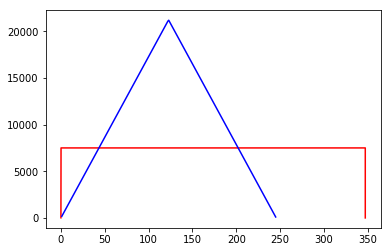

In [14]:
plt.plot(BFR_t,BFR_v,'r',Hermes_t,Hermes_v,'b')

Note that the acceleration and deacelleration phases of the conventional rocket are very short—a few minutes, and thus when drawn on a horizontal scale measured in days, appear nearly vertical. 

### A rocket with varying mass

In both of these scenarios, we've made an assumption that the mass of the spacecraft remains constant throughout its journey. Given that the mass of most rockets is fuel, this assumption is not very physical. Using the computational modeling power of python, we can devise a better model assuming a varying mass rocket. 

In [this paper](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20150019662.pdf), NASA scientist, Laura Burke, calculates a realistic trajectory of the Heremes taking into account the varying mass of the spacecraft and the motion of Earth and Mars. Since details of these calculations are well beyond most first year physics courses, we will use her values to create parameters for our simplified 1-D model.

In [15]:
m_Hermes = 110e3 #kg
m_Fuel = 126e3 #kg


Assuming the acceleration of the Hermes listed above is the initial acceleration, we can calculate the initial thrust of the rocket using Newton's 2nd law.

In [16]:
Thrust = a_Hermes*(m_Fuel+m_Hermes)

A more realistic assumption for our rocket is that this thrust will remain constant, while the mass of the rocket decreases. 

In Burke's much more comprehensive paper that calculated a realistic trajectory for the Hermes, she assumed a constant specific impulse of 5000s. Specific Impulse is a commonly used quantity in rcketry, ans is usually abbreviated $I_{sp}$. It is a measure of how effectively a rocket uses propellant or a jet engine uses fuel. By definition, it is the total impulse (or change in momentum) delivered per unit of propellant consume and is dimensionally equivalent to the generated thrust divided by the propellant mass flow rate or weight flow rate.We can calulcate the mass change rate knowing the specific Impulse, $I_{sp} = \frac{F}{\frac{dm}{dt}g}$

In [17]:
I_sp = 5000
dmdt=Thrust/9.8/I_sp

print(dmdt)

0.009632653061224489


The mass of the Hermes spacecraft is decreasing at a rate of 0.009 kg per second. 

At some point, $t_p$, the Herems will reorient itself so that its ion engine switches from accelerating the spacecraft to decaccelerating the spacecraft. Our challenge is that we don't know at what point this will be. If $t_p$ is too soon, Hermes will decaccerate to the point where it begins to speed up in the direction of earth, effectively "turning around" and will never reach Mars. If $t_p$ is too late, Hermes will still be moving when it passes Mars. 

Our goal is to find the smallest value of $t_p$ so that 1. Hermes reaches Mars and 2. has a velocity of 0 m/s when it arrives.

This is a challenging problem to solve analytically—some of the steps involve calculus that would be accessible to the introductory physics students, but a complete analytical solution is well beyond introductory physics. 

It is possible to solve this problem computationally by creating a loop to test different values of $t_p$ until we arrive at one that satisfies conditions 1 and 2 above.

We can write a computational model to calculate the position of the Heremes

In [18]:
pos = 0
v = 0
t = 0
dt = 1 #seconds
Mtot =m_Hermes + m_Fuel
for tp in range(58,100): #search over possible values for the t_p as a percent of the total trip distance
    pos = 0
    v = 0
    t = 0
    Mtot =m_Hermes + m_Fuel
    while pos < marsDist:
        #update velocity
        if pos < tp/100*marsDist:
            v = v + Thrust/Mtot*dt #accelerate
        else:
            v = v - Thrust/Mtot*dt #deaccelerate
        if v < 0:
            print("fail-didn't reach mars", tp)
            
            break
        #update mass
        Mtot = Mtot - dmdt*dt
        #update position
        pos = pos + v*dt
        #update time
        t = t+dt
    if pos > marsDist:
        print("success--reached mars", tp)
        break

print(pos/marsDist)
print(t/24/3600)
print(v)

fail-didn't reach mars 58
fail-didn't reach mars 59
success--reached mars 60
1.0000000217312763
183.15199074074073
5090.316399704074


If Heremes begins to reverse its thurst at 59% of the distance to Mars, it will just arrive at Mars with a velocity of around 5000m /s. 

We can also see this graphically. 

In [19]:
RHermes_v=[]
RHermes_t=[]

In [20]:
pos = 0
v = 0
t = 0
Mtot =m_Hermes + m_Fuel
while pos < marsDist:
    if pos < .59*marsDist:
         v = v + Thrust/Mtot*dt
    else:
         v = v - Thrust/Mtot*dt
    if v < 0:            
        break
    Mtot = Mtot - dmdt*dt
    pos = pos + v*dt
    t = t+dt     
    RHermes_v.append(v)
    RHermes_t.append(t/3600/24)
    if pos > marsDist: 
        break

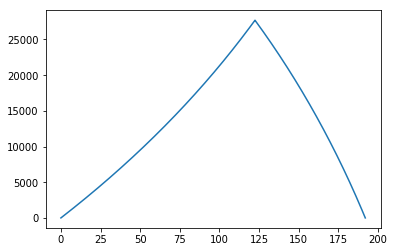

In [21]:
plt.plot(RHermes_t,RHermes_v)

Combining all three scenarios into a sigle graph, we get:

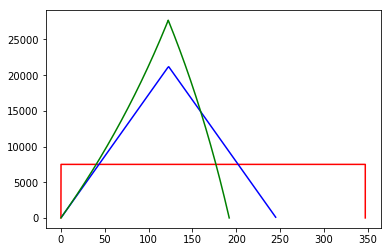

In [22]:
plt.plot(BFR_t,BFR_v,'r',Hermes_t,Hermes_v,'b',RHermes_t,RHermes_v,'g')

From this graph, we can see that the Ion drive delivers even better performeance than our previous constant acceleration assumption. In the constant thrust ion drive scenario, Hermes arrives at Mars in 180 days, almost 60 days ahead of the constant acceleration ion drive case. This shorter trip time reduces the time of radiation exposure, reducing the amount of food and supplies that must be carried on board, and also possibly reducing the need for radiation shielding, since the exposure time is shorter. Additionally, the acceleration in the ion drive scenairos are far smaller and therefore more comofortable than the accelerations experienced on the conventional rocket during its short ascent and descent periods. 